## TP2

#### Question 1

In [1]:
%%file f1.m
function [p, E]=f1(x, f)
    n =size(x,2);
    A = zeros(n, n);
    b = zeros(n, 1);
    %regarder fonction vander pour faire la matrice de vandermonde
    for (i=1:n)
        b(i)=f(x(i));
        for (j=1:n)
            if (j ~=n)
                A(i, n-j)=x(i).^(j-1);
            else 
                A(i,j)=(-1)^i;
            end
        end
    end
    res = linsolve(A, b);
    p = res(1:(end-1));
    E = res(end);
end

Created file '/mnt/nfs/etu/p1925345/M1/Matlab/f1.m'.


### Question 2

#### On code l'algorithme de Remez

In [14]:
%%file Remez.m
function [E, pts] = Remez(n, f, a, b)
    q = 1e-3;
    pts = linspace(a,b,n+2);
    inter = a:(1e-6):b;
    [p_n e] = f1(pts,f);
    E = [e];
    pol = polyval(p_n, inter);
    pol2 = polyval(p_n, pts);
    [M, ind_x_sec] = max(abs(f(inter)-pol)); %LIGNE 10
    x_sec = inter(ind_x_sec);
    i =1;
    l = length(pts);
    
    while (i+1)<=l
        if (pts(i)<= x_sec) && (pts(i+1) >= x_sec)
            sgn = sign(f(x_sec)-pol(ind_x_sec));
            sgn_i = sign(f(pts(i)) - pol2(i));
            if (sgn == sgn_i)
                pts(i) = x_sec; % LIGNE 20
            else 
                pts(i+1) = x_sec;
            end 
            break
        else 
            i = i+1;
        end
    end 
    
    pts; %LIGNE 30
    [p_n e] = f1(pts, f);
    E = [E e];
    pol = polyval(p_n, inter);
    pol2 = polyval(p_n, pts);
    [M, ind_x_sec] = max(abs(f(inter)-pol));
    x_sec = inter(ind_x_sec);
    cmpt = 1;
    
    while ((min(abs(pts - x_sec)) >= q) && (abs(E(end-1) - E(end)) > q)) & cmpt < 10 %LIGNE 40
        i = 1;
        sgn = sign(f(x_sec)- pol(ind_x_sec));
        if (a <=x_sec) & (x_sec <pts(1))
            if (sgn == sign(f(pts(1)) - pol2(1)))
                pts(1) = x_sec;
            else 
                pts = [x_sec, pts(1:(end-1))];
            end
        elseif ((pts(n+2) < x_sec) && (x_sec <= b)) 
            if (sgn == sign(f(pts(n+2)) - pol2(n+2))) %LIGNE 50
                pts(n+2) = x_sec;
            else 
                pts = [pts(2:end), x_sec];
            end
        else 
            while (i+1)<=l
                if (pts(i)<= x_sec) && (pts(i+1) >= x_sec)
                    sgn_i = sign(f(pts(i)) - pol2(i));
                    if (sgn == sgn_i)
                        pts(i) = x_sec; % LIGNE 60
                    else 
                        pts(i+1) = x_sec;
                    end 
                    break
                else
                    i = i+1;
                end
            end
        end
        [p_n e] = f1(pts, f); % LIGNE 70
        E = [E e];
        pol = polyval(p_n, inter);
        pol2 = polyval(p_n, pts);
        [M, ind_x_sec] = max(abs(f(inter)-pol));
        x_sec = inter(ind_x_sec);
        cmpt = cmpt +1;
    end
    %out = [E, pts];
end

Created file '/mnt/nfs/etu/p1925345/M1/Matlab/Remez.m'.


### Pour la fonction $ sqrt(x) $

In [9]:
a = 0;
b = 1;
gr = linspace(a, b, 1000); % grille pour les plot
f = @(x) sqrt(x);

#### On teste pour plusieurs nombres de points cherchés :

    Remez at line 76 column 14


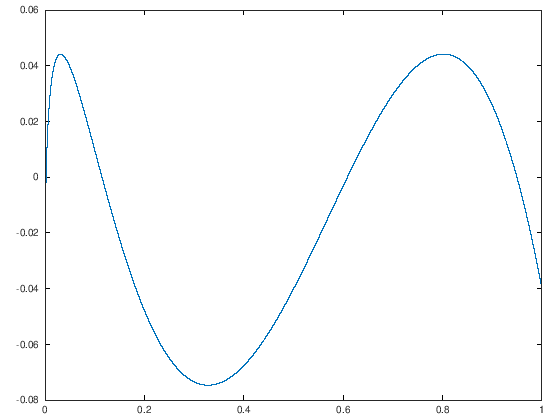

In [13]:
[E, pts3] = Remez(3,f, a, b);
%[E, pts8] = Remez(8,f, a, b);
%[E, pts12] = Remez(12,f, a, b);

    __axis_label__ at line 31 column 3
    title at line 51 column 8
    __axis_label__ at line 31 column 3
    title at line 51 column 8


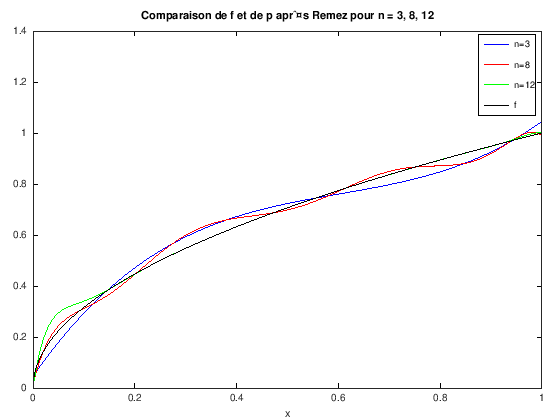

In [6]:
p_n3 = f1(pts3, f);
pol3 = polyval(p_n3, gr);

p_n8 = f1(pts8, f);
pol8 = polyval(p_n8,gr);

p_n12 = f1(pts12, f);
pol12 = polyval(p_n12,gr);

plot(gr, pol3, 'b')
hold on
plot(gr, pol8, 'r')
hold on
plot(gr, pol12, 'g')
hold on
plot(gr, f(gr), 'k')

legend("n=3", "n=8", "n=12", "f")
title("Comparaison de f et de p après Remez pour n = 3, 8, 12")
xlabel("x")

### Pour la fonction $ abs(x) $

In [7]:
a = -1;
b=1;
gr = linspace(a, b, 1000);
g = @(x) abs(x);

In [8]:
[E, pts6] = Remez(6,g, a, b);
[E, pts13] = Remez(12,g, a, b);
[E, pts24] = Remez(24,g, a, b);

    Remez at line 75 column 14
    Remez at line 39 column 5
    Remez at line 39 column 5


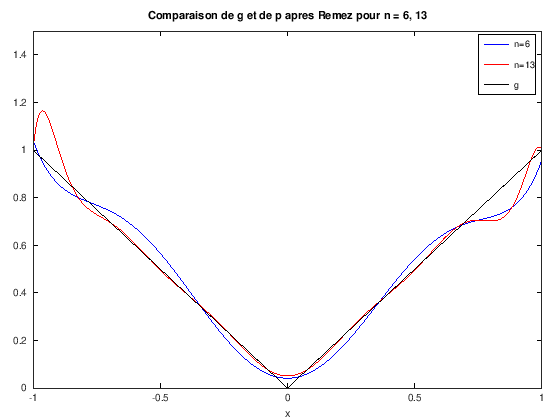

In [9]:
p_n6 = f1(pts6, g);
pol6 = polyval(p_n6, gr);

p_n13 = f1(pts13, g);
pol13 = polyval(p_n13,gr);

p_n24 = f1(pts24, g);
pol24 = polyval(p_n24,gr);

plot(gr, pol6, 'b')
hold on
plot(gr, pol13, 'r')
hold on
plot(gr, g(gr), 'k')
ylim([0 1.5])

legend("n=6", "n=13","g")
title("Comparaison de g et de p apres Remez pour n = 6, 13")
xlabel("x")

#### La courbe pour n=24 éxplose aux bornes, ce qui ne nous permet pas de voir ce qu'il se passe pour les autres courbes :

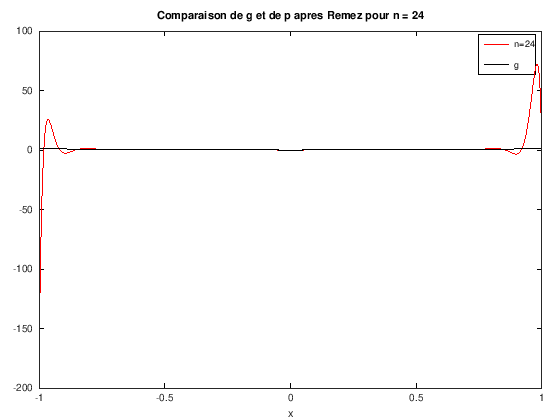

In [10]:
plot(gr, pol24, 'r')
hold on
plot(gr, g(gr), 'k')
legend("n=24", "g")
title("Comparaison de g et de p apres Remez pour n = 24")
xlabel("x")

### Pour la fonction $ x^n $

    Remez at line 39 column 5


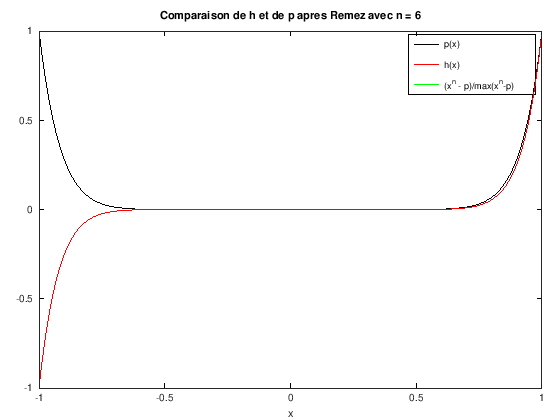

In [11]:
n=13;
h = @(x) x.^n;
[E, pts] = Remez(n,h, a, b);

p_n = f1(pts, h)(1:(end-1));
pol = polyval(p_n, gr);

plot(gr, pol, 'k')
hold on
plot(gr, h(gr), 'r')
hold on
plot(gr, ((h(gr)-pol)/(abs(max(h(gr)-pol)))), 'g', 'Linewidth', 3)
%ylim([-0.5 1.5])
title(["Comparaison de h et de p apres Remez avec n = 6"] )
xlabel('x')
legend('p(x)','h(x)', '(x^n - p)/max(x^n-p)')

#### Question 3

In [12]:
a = -1;
b=0; 
c = 1;
n = 8;
[E1 p1] = Remez(n,f,b,c);
[E2 p2] = Remez(n, g, a, c);

    Remez at line 75 column 14
    Remez at line 75 column 14


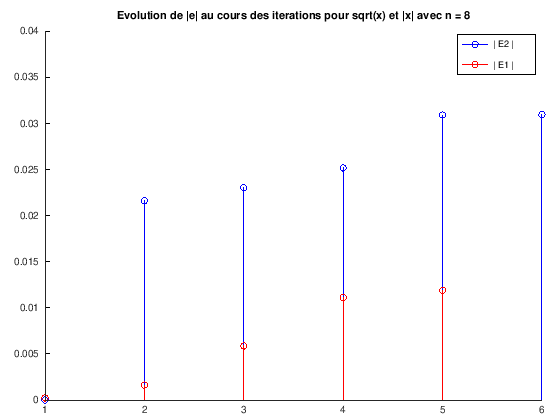

In [13]:
stem(E2, 'b', 'DisplayName',char({'| E2 |  '}))
hold on 
stem(E1, 'r', 'DisplayName',char({'| E1 |  '}))
legend
title("Evolution de |e| au cours des iterations pour sqrt(x) et |x| avec n = 8")

#### A chaque itération et pour les deux fontions étudiées, on remarque que les valeurs de |e| forment bien une suite croissante qui semble avoir une limite.

In [14]:
n = 72;
[E1 p1] = Remez(n,f,b,c);
[E2 p2] = Remez(n, g, a, c);

    linsolve at line 108 column 7
    f1 at line 16 column 9
    Remez at line 5 column 12
    linsolve at line 108 column 7
    f1 at line 16 column 9
    Remez at line 30 column 12
    Remez at line 39 column 5
    linsolve at line 108 column 7
    f1 at line 16 column 9
    Remez at line 5 column 12
    linsolve at line 108 column 7
    f1 at line 16 column 9
    Remez at line 30 column 12
    Remez at line 39 column 5


#### Prenons un n plus grand et effectuons un plot plutôt qu'un stem afin de mieux voir l'évolution de |e|.

ans =  0.000025620


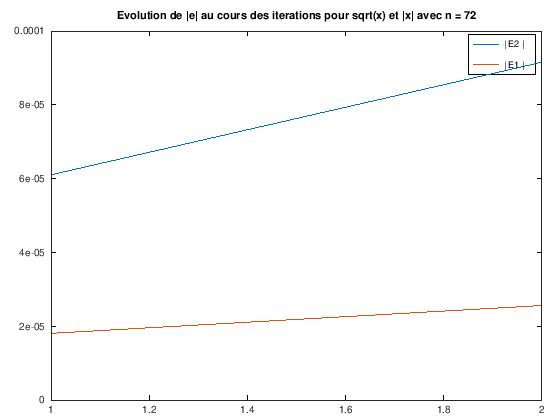

In [16]:
plot(1:length(E2),abs(E2))
hold on 
plot(1:length(E1), abs(E1))
legend("| E2 |", "| E1 |")
title("Evolution de |e| au cours des iterations pour sqrt(x) et |x| avec n = 72")
max(abs(E1))